# Numerical Issues and Condition Numbers: An Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Palatino'],'size': 18})
rc('text', usetex=True)
rc('lines', **{'linewidth':3.0})
rc('axes', **{'labelsize':22})

Here is an example where I wish to fit the linear model

$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4 + a_5 x^5 + a_6 x^6$.

I will be fitting to the function 

$y = x^{1.5}$

over the $x$ range from 50 to 200 (inclusive).  I'll use unit variance for each point and won't add error: this is only to illustrate a numerical issue that can arise.

In [2]:
x = np.arange(50, 201)*1.
y = x**1.5
order = 6

Now I will do the naive fit with the coefficient matrix `A` and will compute the residual.

Text(0, 0.5, 'Residual')

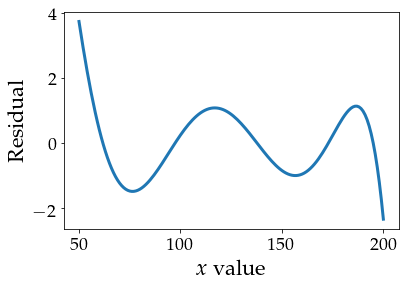

In [3]:
A = np.zeros((len(y), order + 1))
for i in range(order + 1):
    A[:, i] = x**i
    
fitcoefs = np.linalg.lstsq(A, y, rcond=None)[0]

residual = y.copy()
for i in range(order + 1):
    residual -= fitcoefs[i]*A[:, i]
    
plt.plot(x, residual)
plt.xlabel(r"$x$ value")
plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

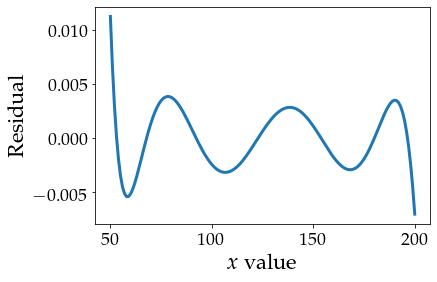

In [4]:
A_rescaled = np.zeros((len(y), order + 1))
for i in range(order + 1):
    A_rescaled[:, i] = (x/np.mean(x))**i
    
fitcoefs_rescaled = np.linalg.lstsq(A_rescaled, y, rcond=None)[0]
residual_rescaled = y.copy()
for i in range(order + 1):
    residual_rescaled -= fitcoefs_rescaled[i]*A_rescaled[:, i]
    
plt.plot(x, residual_rescaled)
plt.xlabel(r"$x$ value")
plt.ylabel("Residual")

That's about 200 times better!  Why?  We reduced the dynamic range of the fit (the coefficients in the `A` matrix ran from $200^0=1$ to $200^6 = 6.4 \times 10^{13}$.  The condition number of the first matrix is big, close to machine precision!  In the second case, this dynamic range is a factor of $10^{10}$ less, so the condition number is low and we can compute a good inverse and a good solution.

In [5]:
print('Condition number first way: %.3g' % (np.linalg.cond(A)))
print('Condition number second way: %.3g' % (np.linalg.cond(A_rescaled)))

Condition number first way: 1.33e+16
Condition number second way: 2.19e+05


This doesn't usually cause trouble, but it can on occasion.  The first part of Homework 2 is an example of a case that can be slightly problematic if you don't normalize frequency.  This is a reason why many people like to reduce the range to $[-1, 1]$ and fit orthogonal polynomials (like Legendre polynomials) when they want a polynomial fit to a function.

Condition number with Legendre polynomials: 3.49


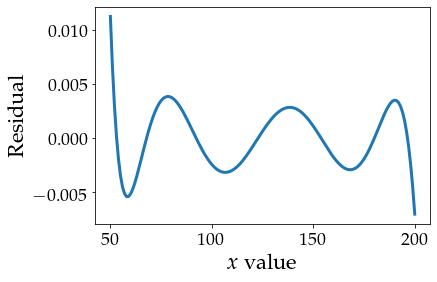

In [6]:
A_legendre = np.zeros((len(y), order + 1))
x_0_1 = (x - np.amin(x))/(np.amax(x) - np.amin(x))
x_m1_1 = x_0_1*2 - 1

for i in range(order + 1):
    legcoefs = np.zeros(order + 1).astype(int)  # All coefficients are zero, except one
    legcoefs[i] = 1   # Set the coefficient of the i-th Legendre polynomial to 1
    A_legendre[:, i] = np.polynomial.legendre.legval(x_m1_1, legcoefs)
    
fitcoefs_legendre = np.linalg.lstsq(A_legendre, y, rcond=None)[0]
residual_legendre = y.copy()
for i in range(order + 1):
    residual_legendre -= fitcoefs_legendre[i]*A_legendre[:, i]
    
plt.plot(x, residual_legendre)
plt.xlabel(r"$x$ value")
plt.ylabel("Residual")

print('Condition number with Legendre polynomials: %.3g' % (np.linalg.cond(A_legendre)))